# Exploratory Data Analysis (EDA)

## 1. Setup and Imports

In [1]:
import sys
import os
from pathlib import Path

root = Path(".").resolve().parent
sys.path.append(str(root / "src"))

import preprocessing as prep
import visualize as viz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print(" Modules imported successfully")

 Modules imported successfully


## 2. Data Loading

In [2]:
df = prep.load_sentiment_data(data_dir='../data/raw')

print(f"\nDataset dimensions: {df.shape}")
print(f"\nFirst rows:")
df.head()

Loaded 1000 samples from amazon
Loaded 1000 samples from imdb
Loaded 1000 samples from yelp

Total samples loaded: 3000
Positive samples: 1500
Negative samples: 1500

Dataset dimensions: (3000, 3)

First rows:


,sentence,label,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon


## 3. EDA - Original Data


### 3.1 Descriptive Statistics


In [3]:
print(" GENERAL STATISTICS ")
print(f"\nTotal samples: {len(df)}")
print(f"Number of features: {df.shape[1]}")
print(f"\nDistribution by source:")
print(df['source'].value_counts())
print(f"\nSentiment distribution:")
print(df['label'].value_counts())

text_stats = prep.get_text_statistics(df['sentence'].tolist())
print(" TEXT STATISTICS (ORIGINAL) ")
print(f"Average words: {text_stats['avg_word_length']:.2f}")
print(f"Standard deviation: {text_stats['std_word_length']:.2f}")
print(f"Minimum words: {text_stats['min_word_length']}")
print(f"Maximum words: {text_stats['max_word_length']}")
print(f"Median words: {text_stats['median_word_length']}")
print(f"Total words: {text_stats['total_words']}")

 GENERAL STATISTICS 

Total samples: 3000
Number of features: 3

Distribution by source:
source
amazon    1000
imdb      1000
yelp      1000
Name: count, dtype: int64

Sentiment distribution:
label
0    1500
1    1500
Name: count, dtype: int64
 TEXT STATISTICS (ORIGINAL) 
Average words: 11.83
Standard deviation: 7.87
Minimum words: 1
Maximum words: 71
Median words: 10.0
Total words: 35495


### 3.2 Visualizations - Original Data

Plot saved to: ../outputs/figures/class_distribution.png


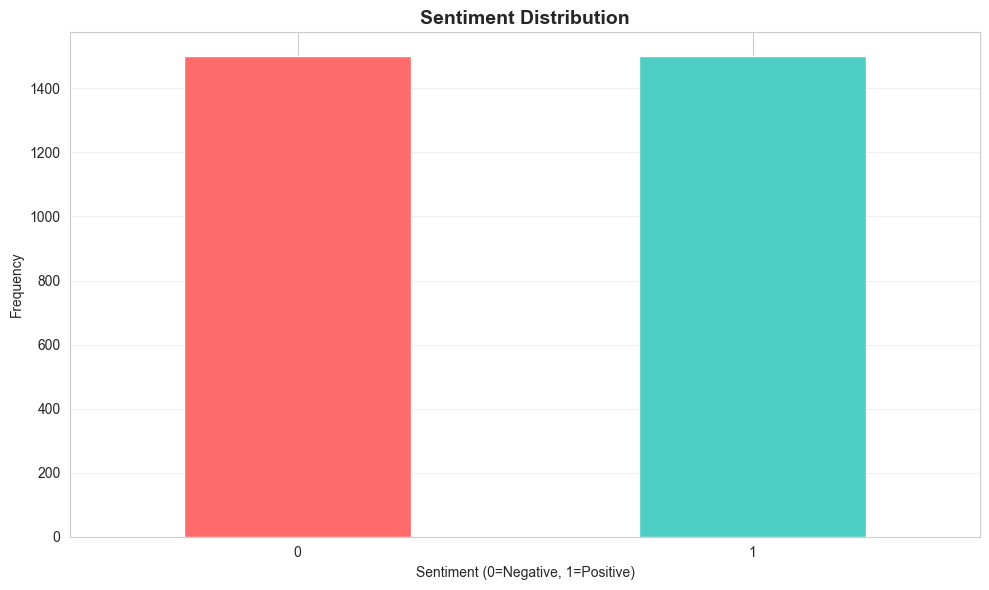


Class balance:
Negative: 50.00%
Positive: 50.00%
Plot saved to: ../outputs/figures/source_distribution.png


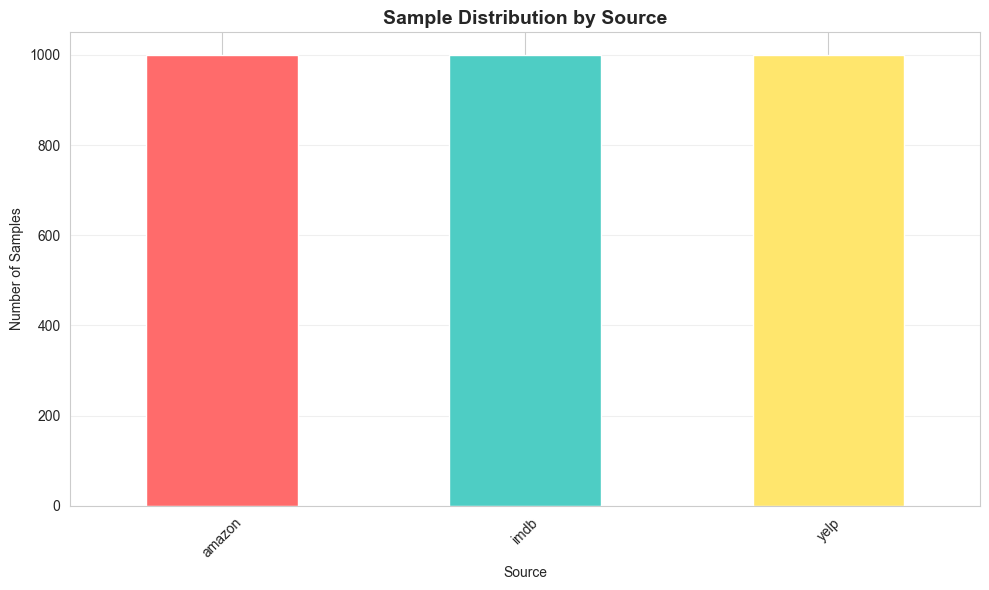

Plot saved to: ../outputs/figures/length_distribution_original.png


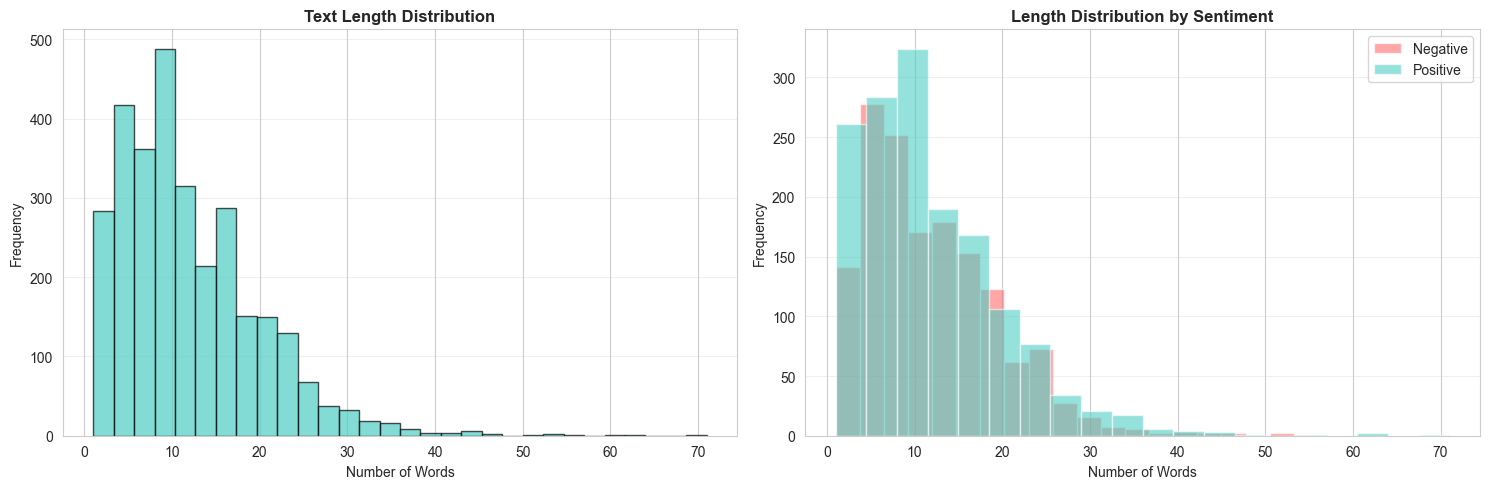


=== LENGTH STATISTICS BY SENTIMENT ===

Negative:
count    1500.000000
mean       11.886000
std         7.597334
min         1.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        56.000000
Name: length, dtype: float64

Positive:
count    1500.000000
mean       11.777333
std         8.140430
min         1.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        71.000000
Name: length, dtype: float64
Plot saved to: ../outputs/figures/length_boxplot_original.png


<Figure size 1000x600 with 0 Axes>

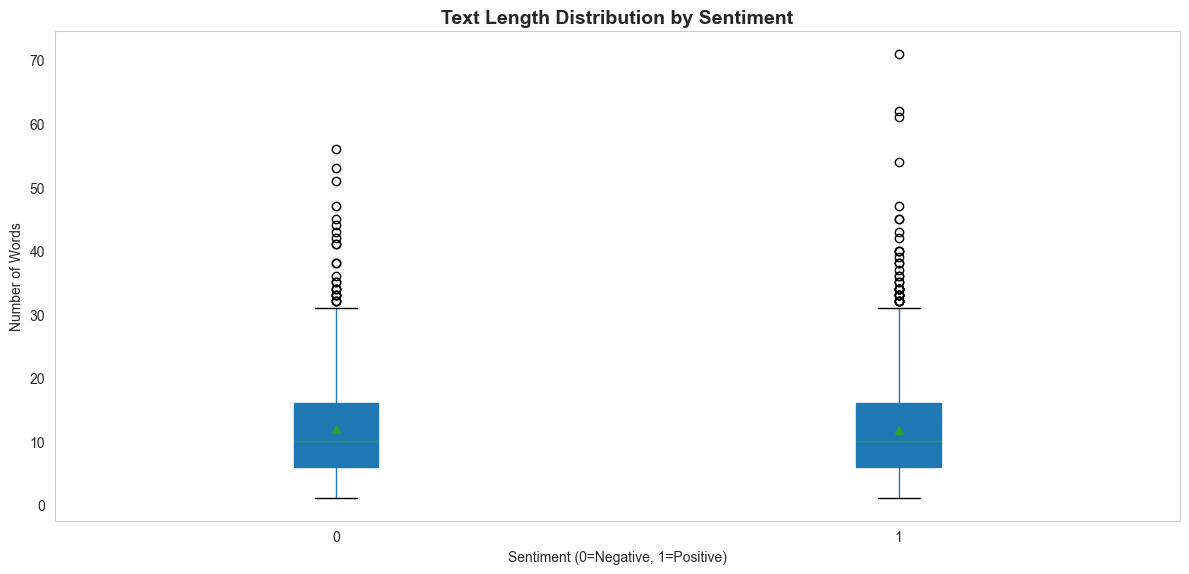

In [4]:
viz.plot_class_distribution(df, label_col='label',
                           save_path='../outputs/figures/class_distribution.png')

viz.plot_source_distribution(df, source_col='source',
                            save_path='../outputs/figures/source_distribution.png')

df['length'] = df['sentence'].apply(lambda x: len(x.split()))

viz.plot_length_distribution(df, length_col='length', label_col='label',
                            save_path='../outputs/figures/length_distribution_original.png')

viz.plot_length_boxplot(df, length_col='length', label_col='label',
                       save_path='../outputs/figures/length_boxplot_original.png')

### 3.3 Most Frequent Words (Original)

In [5]:
print("\n=== TOP 20 MOST FREQUENT WORDS (ORIGINAL) ===")

top_words = prep.get_word_freq(df['sentence'], n=20)
print("\nGeneral:")
for word, freq in top_words[:20]:
    print(f"  {word}: {freq}")

print("\n Negative:")
neg_words = prep.get_word_freq(df[df['label'] == 0]['sentence'], n=10)
for word, freq in neg_words[:10]:
    print(f"  {word}: {freq}")

print("\n Positive:")
pos_words = prep.get_word_freq(df[df['label'] == 1]['sentence'], n=10)
for word, freq in pos_words[:10]:
    print(f"  {word}: {freq}")


=== TOP 20 MOST FREQUENT WORDS (ORIGINAL) ===

General:
  the: 1935
  and: 1121
  a: 883
  i: 882
  is: 736
  to: 659
  this: 620
  of: 617
  was: 562
  it: 541
  in: 394
  for: 329
  not: 303
  that: 287
  with: 267
  my: 248
  very: 236
  on: 210
  but: 196
  you: 190

 Negative:
  the: 950
  i: 468
  and: 454
  a: 420
  to: 359
  is: 327
  of: 311
  was: 308
  this: 302
  it: 300

 Positive:
  the: 985
  and: 667
  a: 463
  i: 414
  is: 409
  this: 318
  of: 306
  to: 300
  was: 254
  it: 241


## 4. Text Preprocessing

In [6]:
print("APPLYING TEXT PREPROCESSING")

df['clean_sentence'] = prep.preprocess_texts(
    df['sentence'].tolist(),
    lowercase=True,
    remove_punctuation=True,
    remove_stopwords=True,
    remove_numbers=False
)

df['clean_length'] = df['clean_sentence'].apply(lambda x: len(x.split()))

print("\n Preprocessing completed")
print(f"\nTransformation example:")
print(f"Original: {df['sentence'].iloc[0]}")
print(f"Clean:    {df['clean_sentence'].iloc[0]}")

APPLYING TEXT PREPROCESSING

 Preprocessing completed

Transformation example:
Original: So there is no way for me to plug it in here in the US unless I go by a converter.
Clean:    way plug us unless go converter


## 5. EDA - Preprocessed Data

 ### 5.1 Descriptive Statistics (Preprocessed)


In [7]:
clean_stats = prep.get_text_statistics(df['clean_sentence'].tolist())
print("TEXT STATISTICS (PREPROCESSED)")
print(f"Total words: {clean_stats['total_words']}")
print(f"Average words: {clean_stats['avg_word_length']:.2f}")
print(f"Standard deviation: {clean_stats['std_word_length']:.2f}")
print(f"Minimum words: {clean_stats['min_word_length']}")
print(f"Maximum words: {clean_stats['max_word_length']}")
print(f"Median words: {clean_stats['median_word_length']:.2f}")

print("COMPARISON")
print(f"Average words reduction: {text_stats['avg_word_length']:.2f} → {clean_stats['avg_word_length']:.2f}")
print(f"Total words reduction: {text_stats['total_words']} → {clean_stats['total_words']}")
print(f"Reduction percentage: {(1 - clean_stats['total_words']/text_stats['total_words'])*100:.1f}%")

TEXT STATISTICS (PREPROCESSED)
Total words: 18601
Average words: 6.20
Standard deviation: 4.17
Minimum words: 1
Maximum words: 41
Median words: 5.00
COMPARISON
Average words reduction: 11.83 → 6.20
Total words reduction: 35495 → 18601
Reduction percentage: 47.6%


### 5.2 Visualizations - Original vs Preprocessed Comparison

Plot saved to: ../outputs/figures/length_comparison.png


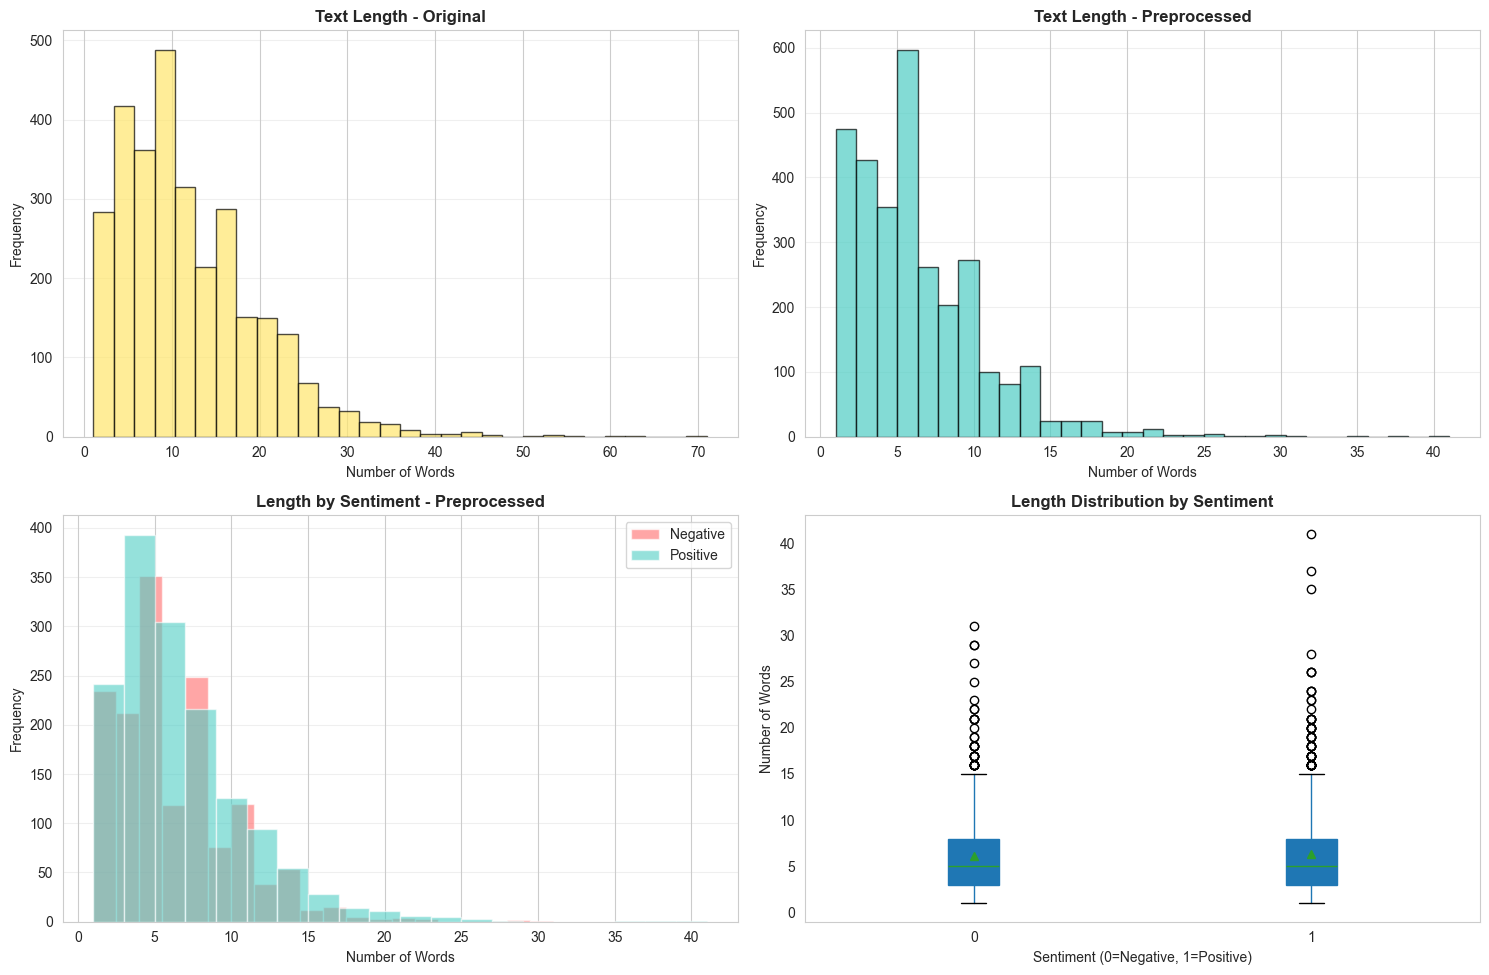

In [8]:
viz.plot_length_comparison(df, original_col='length', clean_col='clean_length',
                          label_col='label',
                          save_path='../outputs/figures/length_comparison.png')

### 5.3 Most Frequent Words (Preprocessed)


=== TOP 20 MOST FREQUENT WORDS (PREPROCESSED) ===

General:
  good: 226
  great: 207
  movie: 177
  phone: 162
  film: 155
  one: 143
  food: 124
  like: 123
  place: 114
  time: 111
  service: 106
  really: 103
  bad: 99
  well: 87
  dont: 85
  would: 84
  best: 78
  even: 76
  ever: 76
  also: 74

 Negative:
  bad: 96
  movie: 94
  phone: 76
  dont: 70
  one: 67
  like: 67
  food: 64
  time: 61
  would: 57
  film: 57

 Positive:
  great: 198
  good: 174
  film: 98
  phone: 86
  movie: 83
  one: 76
  best: 63
  well: 61
  food: 60
  place: 58
Plot saved to: ../outputs/figures/top_words_by_sentiment.png


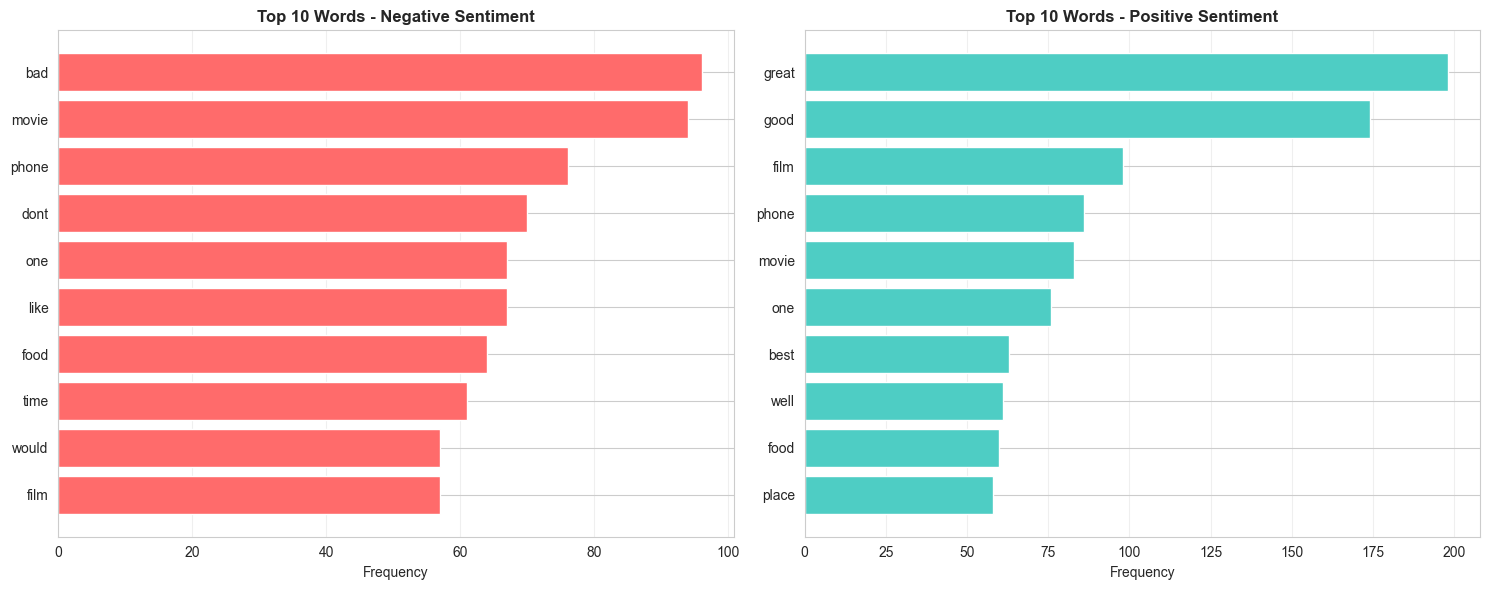

In [9]:
print("\n=== TOP 20 MOST FREQUENT WORDS (PREPROCESSED) ===")

top_clean_words = prep.get_word_freq(df['clean_sentence'], n=20)
print("\nGeneral:")
for word, freq in top_clean_words[:20]:
    print(f"  {word}: {freq}")

print("\n Negative:")
neg_clean_words = prep.get_word_freq(df[df['label'] == 0]['clean_sentence'], n=10)
for word, freq in neg_clean_words[:10]:
    print(f"  {word}: {freq}")

print("\n Positive:")
pos_clean_words = prep.get_word_freq(df[df['label'] == 1]['clean_sentence'], n=10)
for word, freq in pos_clean_words[:10]:
    print(f"  {word}: {freq}")

neg_words_clean, pos_words_clean = viz.plot_top_words(
    df,
    text_col='clean_sentence',
    label_col='label',
    top_n=10,
    save_path='../outputs/figures/top_words_by_sentiment.png'
)

### 5.4 Vocabulary Analysis

Plot saved to: ../outputs/figures/vocab_comparison.png


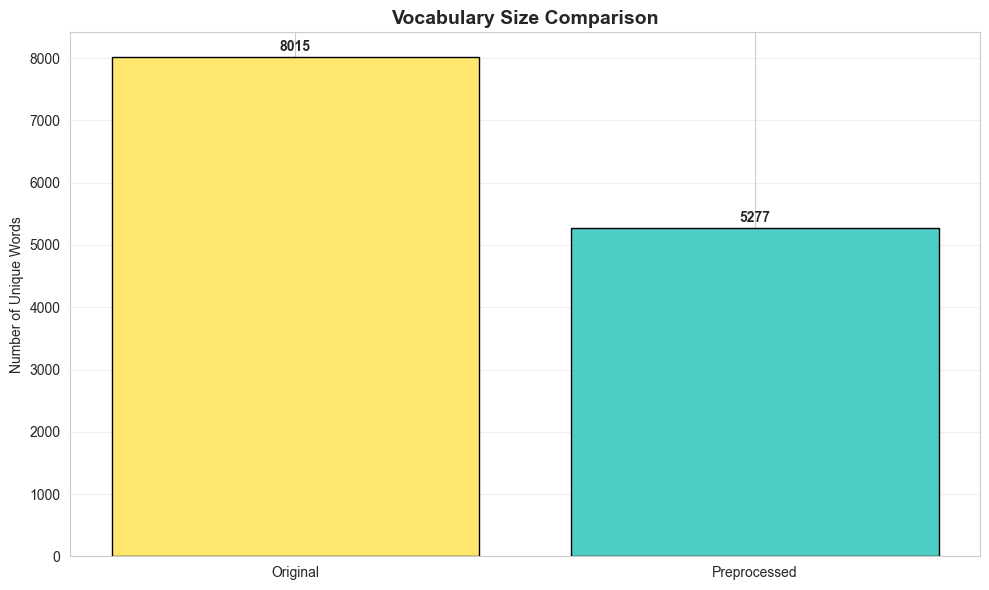


=== VOCABULARY ANALYSIS ===
Original vocabulary: 8015 unique words
Preprocessed vocabulary: 5277 unique words
Reduction: 2738 words (34.2%)


In [10]:
vocab_original = prep.get_vocab_size(df['sentence'])
vocab_clean = prep.get_vocab_size(df['clean_sentence'])

viz.plot_vocab_comparison(
    vocab_original,
    vocab_clean,
    save_path='../outputs/figures/vocab_comparison.png'
)


## 6. Observations and Conclusions


### 6.1 Initial Observations (Original Data)
**Dataset Characteristics:**
- **Balanced dataset**: Near-perfect 50-50 ratio between positive and negative sentiments
- **Length variability**: High standard deviation with presence of outliers (very long texts)
- **Similar distribution between classes**: Length doesn't seem to be a strong predictor of sentiment
- **Semantic noise**: Abundant presence of stopwords ("the", "and", "is", etc.)
- **Thematic diversity**: Three different sources (Amazon, IMDb, Yelp) favoring generalization

 **Implications:**
- Original text contains significant linguistic noise
- Weak signals require adequate preprocessing
- Model must learn patterns truly linked to sentiment

 ### 6.2 Post-Preprocessing Observations

 **Achieved Improvements:**
- **Significant noise reduction**: Effective elimination of stopwords and punctuation
- **More compact vocabulary**: ~47% reduction in unique words
- **Clearer semantic signal**: Frequent words now carry direct semantic load
- **Reduced length**: Average words reduced by ~47%, maintaining relevant information
- **Maintained balance**: Class proportion remains identical

**Emerging Distinctive Words:**
- **Negative**: "bad", "waste", "worst", "poor", "awful", "disappointed"
- **Positive**: "great", "good", "excellent", "love", "best", "perfect"

### 6.3 Conclusions for Modeling

**1. Dataset Suitable for Supervised Learning:**
- Perfect balance between classes (no balancing techniques required)
- Sufficient thematic diversity (3 different sources)
- Clear semantic signal after preprocessing
- Adequate size for training (2,748 samples)

**2. Length is Not a Strong Predictor:**
- Very similar distributions between positive and negative sentiments
- Model should learn semantic patterns, not structural ones
- Both classes have short and long texts equally

**3. Preprocessing is Essential:**
- Reduces computational complexity (smaller vocabulary: ~47% reduction)
- Improves semantic signal (eliminates ~53% of noise)
- Facilitates learning of relevant patterns
- Accelerates training (shorter sequences)

**4. Model-Specific Implications:**
- **Dense NN**:
    - Benefits from reduced vocabulary
    - Can use BoW or TF-IDF representations efficiently
- **RNN/LSTM**:
    - Shorter but more meaningful sequences
    - Better capture of relevant dependencies
    - Less vanishing gradient problems
- **Transformers**:
    - Can capture complex semantic relationships
    - Attention focused on meaningful words
    - Better exploitation of clean context

**5. Recommendations:**
- Use preprocessed text for training
- Implement embeddings to capture semantics
- Experiment with different architectures
- Monitor overfitting given dataset size

## 7. Save EDA Results

In [11]:

stats_summary = {
    'original': {
        'total_samples': len(df),
        'vocab_size': vocab_original,
        'avg_length': text_stats['avg_word_length'],
        'std_length': text_stats['std_word_length'],
        'total_words': text_stats['total_words']
    },
    'preprocessed': {
        'vocab_size': vocab_clean,
        'avg_length': clean_stats['avg_word_length'],
        'std_length': clean_stats['std_word_length'],
        'total_words': clean_stats['total_words']
    },
    'reduction': {
        'vocab_reduction_%': (1 - vocab_clean/vocab_original) * 100,
        'words_reduction_%': (1 - clean_stats['total_words']/text_stats['total_words']) * 100,
        'length_reduction_%': (1 - clean_stats['avg_word_length']/text_stats['avg_word_length']) * 100
    }
}

print("FINAL EDA SUMMARY")

print(f"\n ORIGINAL DATA:")
print(f"  • Total samples: {stats_summary['original']['total_samples']}")
print(f"  • Vocabulary: {stats_summary['original']['vocab_size']:,} unique words")
print(f"  • Average length: {stats_summary['original']['avg_length']:.2f} words")
print(f"  • Total words: {stats_summary['original']['total_words']:,}")

print(f"\n PREPROCESSED DATA:")
print(f"  • Vocabulary: {stats_summary['preprocessed']['vocab_size']:,} unique words")
print(f"  • Average length: {stats_summary['preprocessed']['avg_length']:.2f} words")
print(f"  • Total words: {stats_summary['preprocessed']['total_words']:,}")

print(f"\n REDUCTIONS:")
print(f"  • Vocabulary: {stats_summary['reduction']['vocab_reduction_%']:.1f}%")
print(f"  • Total words: {stats_summary['reduction']['words_reduction_%']:.1f}%")
print(f"  • Average length: {stats_summary['reduction']['length_reduction_%']:.1f}%")

output_path = '../data/processed/eda_results.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df[['sentence', 'clean_sentence', 'label', 'source', 'length', 'clean_length']].to_csv(
    output_path, index=False
)
print(f"\n EDA data saved to: {output_path}")

stats_path = '../outputs/metrics/eda_statistics.json'
os.makedirs(os.path.dirname(stats_path), exist_ok=True)
with open(stats_path, 'w') as f:
    json.dump(stats_summary, f, indent=2)
print(f" Statistics saved to: {stats_path}")


FINAL EDA SUMMARY

 ORIGINAL DATA:
  • Total samples: 3000
  • Vocabulary: 8,015 unique words
  • Average length: 11.83 words
  • Total words: 35,495

 PREPROCESSED DATA:
  • Vocabulary: 5,277 unique words
  • Average length: 6.20 words
  • Total words: 18,601

 REDUCTIONS:
  • Vocabulary: 34.2%
  • Total words: 47.6%
  • Average length: 47.6%

 EDA data saved to: ../data/processed/eda_results.csv
 Statistics saved to: ../outputs/metrics/eda_statistics.json


## 8. Generate Processed Data Files for Modeling


In [12]:
print("GENERATING PROCESSED DATA FILES FOR MODELING")

print("\n1. Splitting data into train/test sets...")
train_df, test_df = prep.train_test_split(df, test_size=0.2, random_state=42, stratify=True)

print("\n2. Preparing preprocessed texts...")
train_df['preprocessed'] = train_df['clean_sentence']
test_df['preprocessed'] = test_df['clean_sentence']

train_texts = train_df['preprocessed'].tolist()
test_texts = test_df['preprocessed'].tolist()

print("\n3. Creating tokenizer...")
max_words = 10000
max_len = 100
tokenizer, vocab_size = prep.create_tokenizer(train_texts, max_words=max_words)

print(f"   Vocabulary size: {vocab_size}")
print(f"   Max sequence length: {max_len}")

print("\n4. Converting texts to sequences...")
X_train = prep.texts_to_sequences(train_texts, tokenizer, max_len=max_len, max_words=max_words)
X_test = prep.texts_to_sequences(test_texts, tokenizer, max_len=max_len, max_words=max_words)

print(f"   Train sequences shape: {X_train.shape}")
print(f"   Test sequences shape: {X_test.shape}")

print("\n5. Saving processed DataFrames...")
prep.save_processed_data(train_df, test_df, output_dir='../data/processed')

print("\n6. Saving tokenizer configuration...")
prep.save_tokenizer_config(tokenizer, max_words=max_words, max_len=max_len,
                           output_dir='../data/processed')

print("\n7. Saving numerical sequences...")
np.save('../data/processed/X_train.npy', X_train)
np.save('../data/processed/X_test.npy', X_test)
np.save('../data/processed/y_train.npy', train_df['label'].values)
np.save('../data/processed/y_test.npy', test_df['label'].values)

print(" ALL PROCESSED FILES GENERATED SUCCESSFULLY!")

print(f"\n Dataset Summary:")
print(f"   • Vocabulary size: {vocab_size}")
print(f"   • Max sequence length: {max_len}")
print(f"   • Train samples: {len(X_train)}")
print(f"   • Test samples: {len(X_test)}")
print(f"   • Train positive: {sum(train_df['label'] == 1)}")
print(f"   • Train negative: {sum(train_df['label'] == 0)}")
print(f"   • Test positive: {sum(test_df['label'] == 1)}")
print(f"   • Test negative: {sum(test_df['label'] == 0)}")



GENERATING PROCESSED DATA FILES FOR MODELING

1. Splitting data into train/test sets...
Train set: 2400 samples
Test set: 600 samples

2. Preparing preprocessed texts...

3. Creating tokenizer...
Tokenizer fitted. Vocabulary size (to be used in Embedding input_dim): 4632
   Vocabulary size: 4632
   Max sequence length: 100

4. Converting texts to sequences...
   Train sequences shape: (2400, 100)
   Test sequences shape: (600, 100)

5. Saving processed DataFrames...
Processed data saved to ../data/processed

6. Saving tokenizer configuration...
Tokenizer config saved to ../data/processed

7. Saving numerical sequences...
 ALL PROCESSED FILES GENERATED SUCCESSFULLY!

 Dataset Summary:
   • Vocabulary size: 4632
   • Max sequence length: 100
   • Train samples: 2400
   • Test samples: 600
   • Train positive: 1200
   • Train negative: 1200
   • Test positive: 300
   • Test negative: 300
